In [1]:
import cv2
import matplotlib.pyplot as plt
import os, glob

In [2]:
print(cv2.__version__)

4.5.2


In [15]:
def sorted_list(path):
    
    tmplist = glob.glob(path)
    tmplist.sort()
    
    return tmplist

In [30]:
#path = '/home/kyj1103/darkflow/sample_img'
path = '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/'
#path = '/home/kyj1103/tttt'

In [31]:
list_data = sorted_list(os.path.join(path,'*'))

In [32]:
list_data

['/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ac517380-00000000.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ac56c836-bdabca21.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ac6d4f42-00000000.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ac6e638d-7c84846d.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ac73d367-0cb39ad0.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ac985232-00000000.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ac9be3fe-790d1f8e.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/aca32929-00000000.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/aca4b150-00000000.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/acaaf824-00000000.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ace9bf57-669189d2.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ad522266-1f8f3ba4.jpg',
 '/data/open_dt/bdd_dataset/bdd100k/images/10k/test/ad9f7908-42ec4c0e.jpg',
 '/data/open

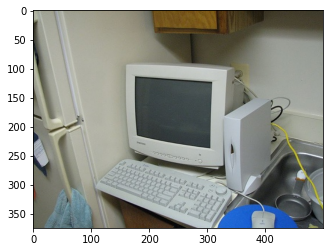

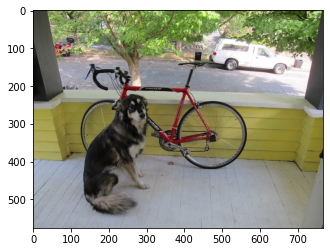

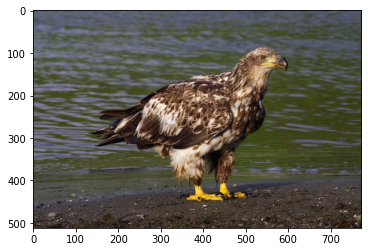

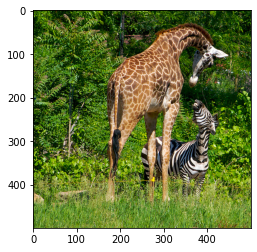

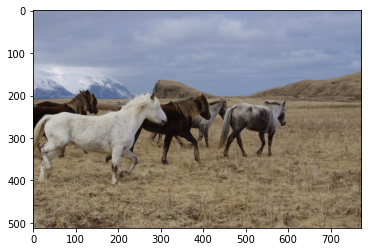

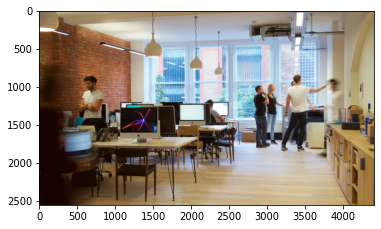

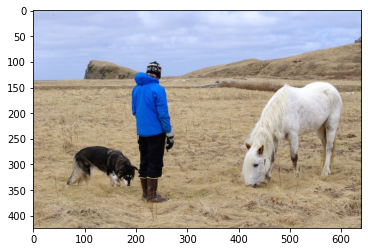

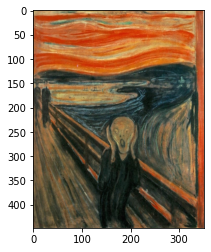

In [24]:
for i in list_data:
    img = cv2.imread(i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

### <dnn.detectionModel>

In [25]:
net = cv2.dnn_DetectionModel('yolov4.weights', 'yolov4.cfg')
net.setInputSize(704,704)
net.setInputScale(1.0 / 255)
net.setInputSwapRB(True)

frame = cv2.imread(path+'/sample_dog.jpg')

In [26]:
with open("coco.names", "rt") as f:
    names = f.read().rstrip('\n').split('\n')
classes, confidences,boxes = net.detect(frame,confThreshold=0.1, nmsThreshold=0.4)

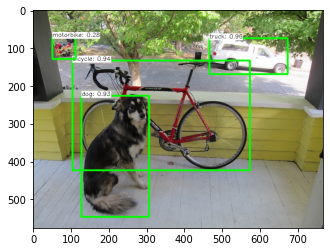

In [27]:
if len(classes) > 0:
    for classId,confidence,box in zip(classes.flatten(), confidences.flatten(), boxes):
        label = '%.2f' % confidence
        label = '%s: %s' % (names[classId], label)
        labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5,1)
        left, top, width, height = box
        top = max(top,labelSize[1])
        cv2.rectangle(frame,box,color=(0,255,0),thickness=3)
        cv2.rectangle(frame, (left,top - labelSize[1]), (left+labelSize[0], top+baseLine), (255,255,255), cv2.FILLED)
        cv2.putText(frame,label, (left,top), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0))
    
    
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))    
plt.show()   

##### 코드합체

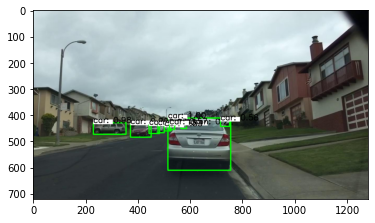

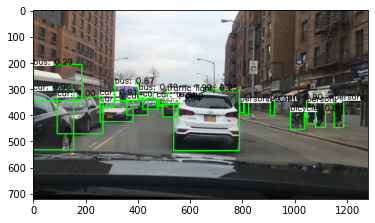

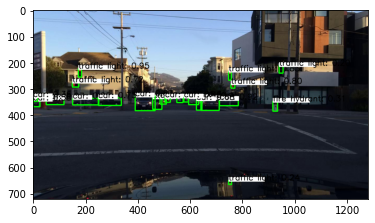

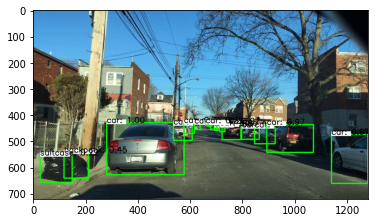

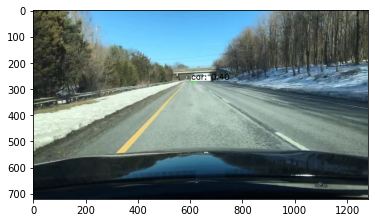

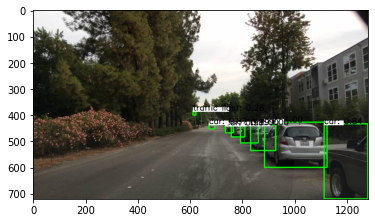

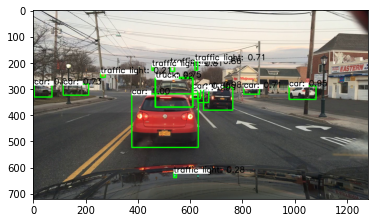

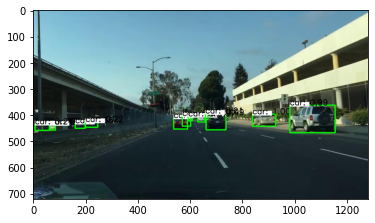

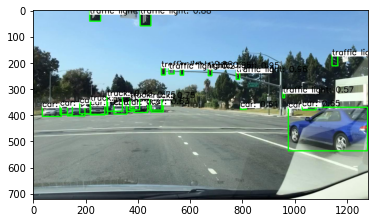

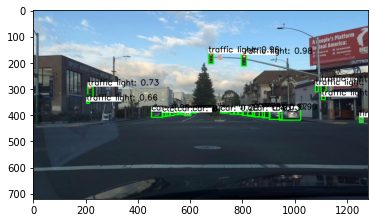

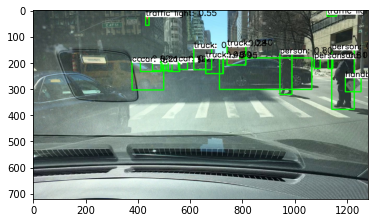

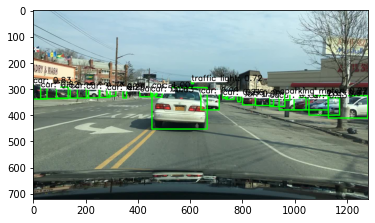

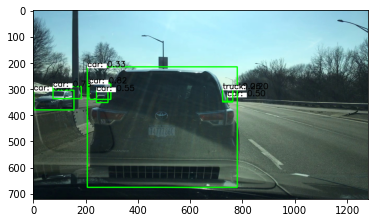

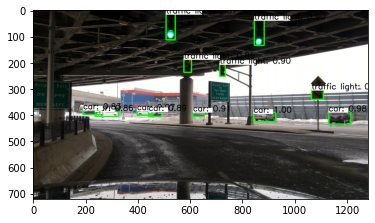

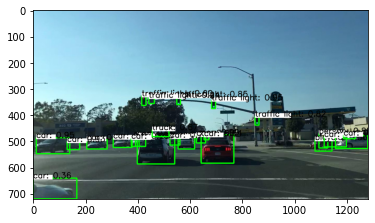

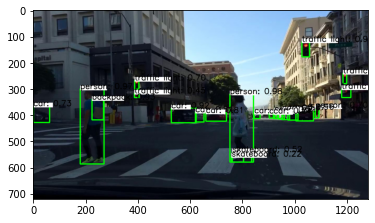

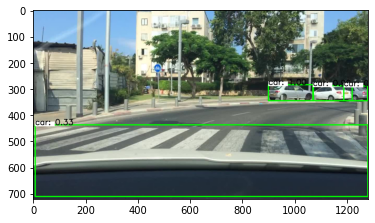

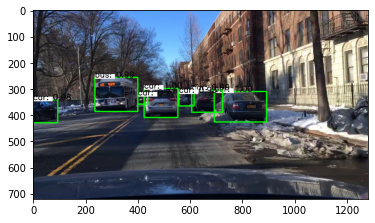

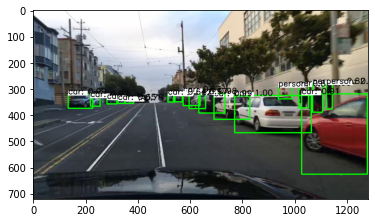

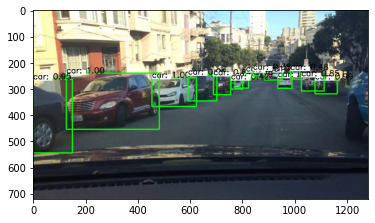

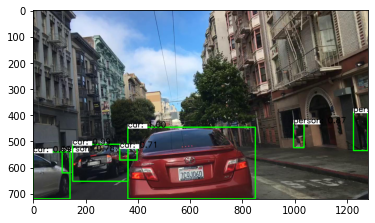

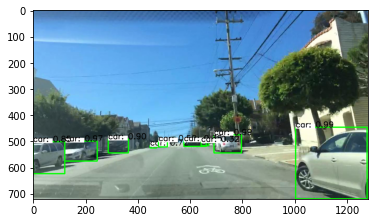

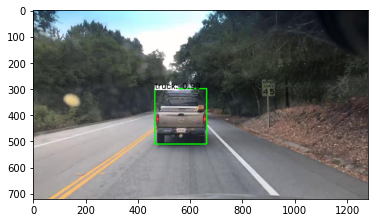

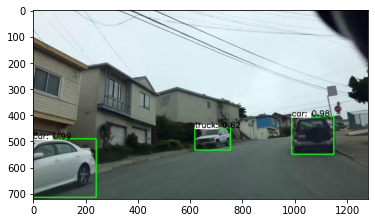

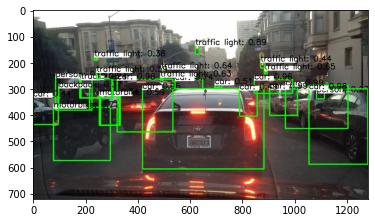

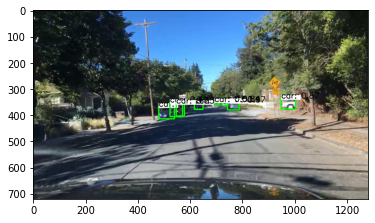

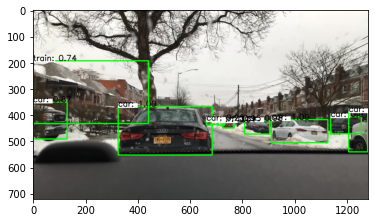

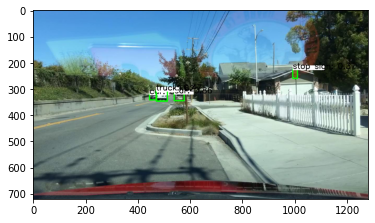

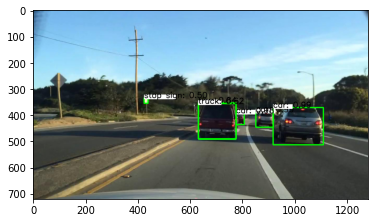

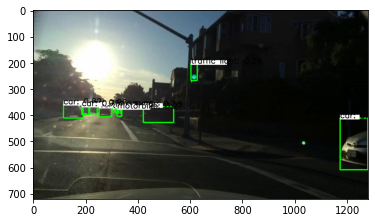

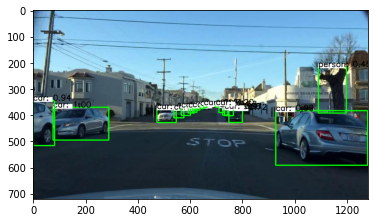

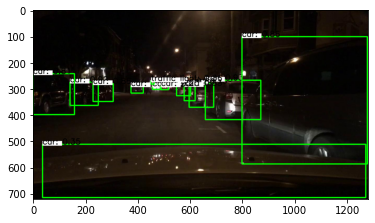

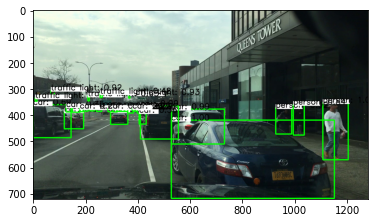

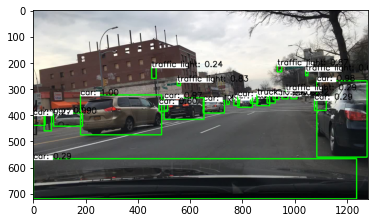

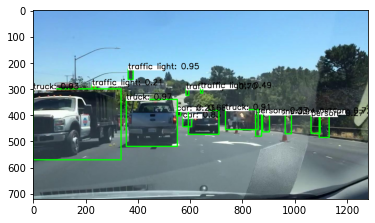

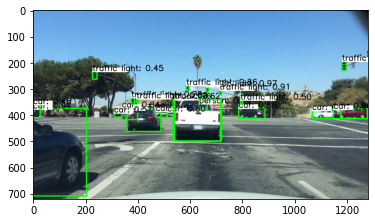

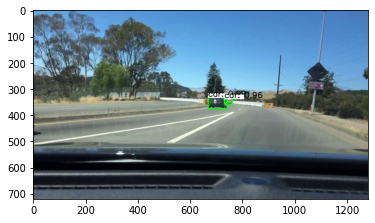

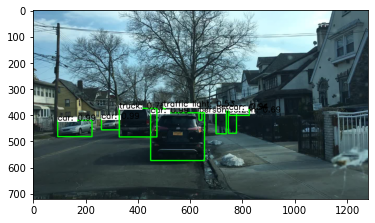

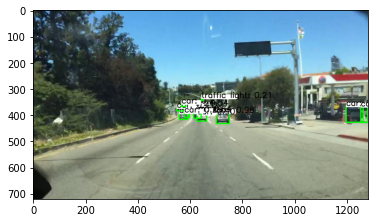

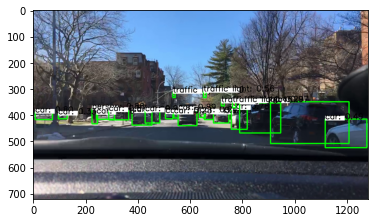

In [33]:
for i in list_data[:40]:
    img = cv2.imread(i)
    
    net = cv2.dnn_DetectionModel('yolov4.weights', 'yolov4.cfg')
    net.setInputSize(704,704)
    net.setInputScale(1.0 / 255)
    net.setInputSwapRB(True)

    frame = cv2.imread(i)
    
    with open("coco.names", "rt") as f:
        names = f.read().rstrip('\n').split('\n')
    classes, confidences,boxes = net.detect(frame,confThreshold=0.1, nmsThreshold=0.4)
    
    
    
    if len(classes) > 0:
        for classId,confidence,box in zip(classes.flatten(), confidences.flatten(), boxes):
            label = '%.2f' % confidence
            label = '%s: %s' % (names[classId], label)
            labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5,1)
            left, top, width, height = box
            top = max(top,labelSize[1])
            cv2.rectangle(frame,box,color=(0,255,0),thickness=3)
            cv2.rectangle(frame, (left,top - labelSize[1]), (left+labelSize[0], top+baseLine), (255,255,255), cv2.FILLED)
            cv2.putText(frame,label, (left,top), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),thickness=2)
    
    
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))    
    plt.show()      

### 동영상적용

In [10]:
import cv2
import time
import ipywidgets as widgets 
import IPython.display as display

In [26]:
net = cv2.dnn_DetectionModel('yolov4.weights', 'yolov4.cfg')
net.setInputSize(704,704)
net.setInputScale(1.0 / 255)
net.setInputSwapRB(True)


<dnn_Model 0x7f107bc1ea70>

In [32]:
path = '/data/open_dt'
cap = cv2.VideoCapture(path+'/sejong_drive.mp4')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

width, height = frame_size

frame_size= (2048, 1536)


In [33]:
with open("coco.names", "rt") as f:
    class_names = [cname.strip() for cname in f.readlines()]

In [11]:
#Jupyter notebook에서 Widget 생성
wImg = widgets.Image(layout = widgets.Layout(border="solid") ) 
display.display(wImg) 

Image(value=b'', layout="Layout(border='solid')")

In [ ]:
import cv2
import time

CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4
COLORS = [(0, 255, 255), (255, 255, 0), (0, 255, 0), (255, 0, 0)]

class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

    
path = '/data/open_dt'
vc = cv2.VideoCapture(path+'/sejong_drive.mp4')


net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
#net.setInputSize(704,704)
#net.setInputScale(1.0 / 255)
#net.setInputSwapRB(True)


model = cv2.dnn_DetectionModel(net)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)

while cv2.waitKey(1) < 1:
    (grabbed, frame) = vc.read()
    if not grabbed:
        exit()

    start = time.time()
    classes, scores, boxes = model.detect(frame, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)
    end = time.time()

    start_drawing = time.time()
    for (classid, score, box) in zip(classes, scores, boxes):
        color = COLORS[int(classid) % len(COLORS)]
        label = "%s : %f" % (class_names[classid[0]], score)
        cv2.rectangle(frame, box, color, 2)
        cv2.putText(frame, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    end_drawing = time.time()
    
    fps_label = "FPS: %.2f (excluding drawing time of %.2fms)" % (1 / (end - start), (end_drawing - start_drawing) * 1000)
    cv2.putText(frame, fps_label, (0, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    
    
    
vc.release()

In [7]:
CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4
COLORS = [(0, 255, 255), (255, 255, 0), (0, 255, 0), (255, 0, 0)]

In [8]:
net = cv2.dnn_DetectionModel('yolov4.weights', 'yolov4.cfg')
net.setInputSize(704,704)
net.setInputScale(1.0 / 255)
net.setInputSwapRB(True)

class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

In [9]:
path = '/data/open_dt'
cap = cv2.VideoCapture(path+'/sejong_drive.mp4')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

width, height = frame_size

frame_size= (2048, 1536)


In [10]:
#Jupyter notebook에서 Widget 생성
wImg = widgets.Image(layout = widgets.Layout(border="solid") ) 
display.display(wImg) 

Image(value=b'', layout="Layout(border='solid')")

IndentationError: unexpected unindent (<ipython-input-11-cf1041c2949e>, line 36)

In [44]:
outs

NameError: name 'outs' is not defined

In [15]:
CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4
COLORS = [(0, 255, 255), (255, 255, 0), (0, 255, 0), (255, 0, 0)]

In [16]:
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

In [17]:
path = '/data/open_dt'
vc = cv2.VideoCapture(path+'/sejong_drive.mp4')

frame_size = (int(vc.get(cv2.CAP_PROP_FRAME_WIDTH)),int(vc.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

width, height = frame_size

frame_size= (2048, 1536)


In [18]:
#Jupyter notebook에서 Widget 생성
wImg = widgets.Image(layout = widgets.Layout(border="solid") ) 
display.display(wImg) 

Image(value=b'', layout="Layout(border='solid')")

In [13]:
#비디오 객체 있을시
if cap.isOpened(): 
    #비디오 객체의 정보를 얻어옴
    ret,img  = cap.read() 
    
    while ret: 
        try:
            # 동영상 파일에서 캡쳐된 이미지를 이미지 파일 스트림으로 다시 인코딩을 한다. 
            tmpStream = cv2.imencode(".jpeg", img)[1].tostring() 
            wImg.value = tmpStream 
            # 20 프레임이 되기 위한 딜레이 다만, 실제로 입력한 것보다 조금 더 딜레이가 있다 
            time.sleep(0.05)
            ret, img = cap.read()
            
            net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
            net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
            net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

            model = cv2.dnn_DetectionModel(net)
            model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)
            
            
            if len(classes) > 0:
                for classId,confidence,box in zip(classes.flatten(), confidences.flatten(), boxes):
                    label = '%.2f' % confidence
                    label = '%s: %s' % (names[classId], label)
                    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5,1)
                    left, top, width, height = box
                    top = max(top,labelSize[1])
                    cv2.rectangle(frame,box,color=(0,255,0),thickness=3)
                    cv2.rectangle(frame, (left,top - labelSize[1]), (left+labelSize[0], top+baseLine), (255,255,255), cv2.FILLED)
                    cv2.putText(frame,label, (left,top), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),thickness=2)
                    
                    
                    
cap.release()

IndentationError: unexpected unindent (<ipython-input-13-cf1041c2949e>, line 36)

In [20]:
CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4
COLORS = [(0, 255, 255), (255, 255, 0), (0, 255, 0), (255, 0, 0)]

class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

vc = cv2.VideoCapture("demo.mp4")

net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

model = cv2.dnn_DetectionModel(net)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)

while cv2.waitKey(1) < 1:
    (grabbed, frame) = vc.read()
    if not grabbed:
        exit()

    start = time.time()
    classes, scores, boxes = model.detect(frame, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)
    end = time.time()

    start_drawing = time.time()
    for (classid, score, box) in zip(classes, scores, boxes):
        color = COLORS[int(classid) % len(COLORS)]
        label = "%s : %f" % (class_names[classid[0]], score)
        cv2.rectangle(frame, box, color, 2)
        cv2.putText(frame, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    end_drawing = time.time()
    
    fps_label = "FPS: %.2f (excluding drawing time of %.2fms)" % (1 / (end - start), (end_drawing - start_drawing) * 1000)
    cv2.putText(frame, fps_label, (0, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    cv2.imshow("detections", frame)


error: OpenCV(4.5.2) /tmp/pip-req-build-wu1ri_rx/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
